**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ssn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Import Dataset**

In [2]:
# Import Dataset
data=pd.read_csv('Insurance Dataset.csv')
data

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,...,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,...,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


**EDA**

In [3]:
#understanding the data

In [4]:
data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [5]:
data.tail()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,...,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,...,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3
1048574,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,2,Emergency,Home or Self Care,...,1.0,Medical,0,N,Y,24832.23,4974.66,0.200331,1,2


In [6]:
data.describe()

,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.046119e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048533e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.529400e+02,1.987936e+02,9.723249e+01,2.051806e+00,1.748955e+00,2.935512e+02,2.708697e+04,1.046399e+04,4.565822e-01,7.499769e-01,1.935755e+00
std,6.711577e+02,1.652839e+02,8.732697e+01,9.145785e-01,9.864236e-01,9.494631e+02,5.487428e+04,2.230366e+04,8.029246e-01,4.330263e-01,7.717916e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.130000e+02,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.402500e+03,3.234570e+03,3.135802e-01,0.000000e+00,1.000000e+00
50%,6.300000e+02,1.590000e+02,9.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.458988e+04,5.928480e+03,4.091384e-01,1.000000e+00,2.000000e+00
75%,9.770000e+02,2.180000e+02,1.740000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.914547e+04,1.134317e+04,5.192548e-01,1.000000e+00,3.000000e+00
max,9.250000e+03,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


In [7]:
#size of dataframe
data.size

25165800

In [8]:
#shape of DataFrame
data.shape

(1048575, 24)

In [9]:
#data types
data.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                              float64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                          object
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost            

In [10]:
data.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [11]:
data.nunique().sort_values(ascending=False)

ratio_of_total_costs_to_total_charges    987065
Tot_charg                                869659
Tot_cost                                 766537
apr_drg_description                         316
ccs_diagnosis_code                          262
ccs_procedure_code                          230
Hospital Id                                 143
Days_spend_hsptl                            120
Weight_baby                                  70
Hospital County                              51
Home or self care,                           19
Area_Service                                  7
Admission_type                                6
Code_illness                                  5
Age                                           5
Payment_Typology                              5
Mortality risk                                4
Cultural_group                                4
Surg_Description                              3
ethnicity                                     3
Gender                                  

In [12]:
data['Hospital Id'].unique()

array([3.700e+01,       nan, 3.900e+01, 6.600e+01, 9.800e+01, 1.020e+02,
       1.030e+02, 1.110e+02, 1.140e+02, 2.070e+02, 2.080e+02, 2.100e+02,
       2.110e+02, 2.130e+02, 2.150e+02, 2.160e+02, 2.180e+02, 2.670e+02,
       2.800e+02, 2.920e+02, 3.390e+02, 3.400e+02, 5.650e+02, 5.740e+02,
       5.810e+02, 5.830e+02, 5.850e+02, 7.180e+02, 1.153e+03, 3.067e+03,
       1.160e+02, 1.180e+02, 3.930e+02, 4.090e+02, 4.110e+02, 4.120e+02,
       4.130e+02, 4.140e+02, 4.610e+02, 4.710e+02, 6.710e+02, 6.760e+02,
       6.780e+02, 8.580e+02, 8.660e+02, 8.700e+02, 8.730e+02, 1.028e+03,
       1.158e+03, 5.785e+03, 1.200e+01, 4.200e+01, 4.300e+01, 5.800e+01,
       8.500e+01, 1.280e+02, 1.580e+02, 3.620e+02, 3.670e+02, 3.770e+02,
       3.790e+02, 3.830e+02, 3.970e+02, 4.010e+02, 5.890e+02, 5.970e+02,
       5.980e+02, 5.990e+02, 6.280e+02, 6.300e+02, 6.350e+02, 6.360e+02,
       7.270e+02, 7.980e+02, 8.040e+02, 8.120e+02, 8.150e+02, 8.170e+02,
       9.770e+02, 9.059e+03, 1.000e+00, 2.000e+00, 

In [13]:
#cleaning the data

In [14]:
data.isnull().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [15]:
#drop this column
data.drop(['Hospital Id'],axis=1,inplace=True)

In [16]:
data.head()

,Area_Service,Hospital County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [17]:
#relationship analysis

In [18]:
corr=data.corr()
corr

,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
ccs_diagnosis_code,1.000000,0.051069,-0.181702,-0.269193,0.035328,-0.076453,-0.042058,0.030600,0.000708,-0.075638
ccs_procedure_code,0.051069,1.000000,0.012005,-0.035898,0.117979,0.025018,0.033304,0.017387,0.000010,-0.051849
Code_illness,-0.181702,0.012005,1.000000,0.636386,-0.269966,0.291459,0.247437,-0.034142,0.000796,0.157933
Mortality risk,-0.269193,-0.035898,0.636386,1.000000,-0.221699,0.222608,0.182591,-0.037110,0.001643,0.183381
Weight_baby,0.035328,0.117979,-0.269966,-0.221699,1.000000,-0.102709,-0.100312,0.018628,-0.000262,-0.124515
Tot_charg,-0.076453,0.025018,0.291459,0.222608,-0.102709,1.000000,0.723150,-0.043201,-0.001594,0.081664
Tot_cost,-0.042058,0.033304,0.247437,0.182591,-0.100312,0.723150,1.000000,0.421863,-0.001826,0.057332
ratio_of_total_costs_to_total_charges,0.030600,0.017387,-0.034142,-0.037110,0.018628,-0.043201,0.421863,1.000000,0.000629,-0.034644
Result,0.000708,0.000010,0.000796,0.001643,-0.000262,-0.001594,-0.001826,0.000629,1.000000,0.000565
Payment_Typology,-0.075638,-0.051849,0.157933,0.183381,-0.124515,0.081664,0.057332,-0.034644,0.000565,1.000000


<AxesSubplot:>

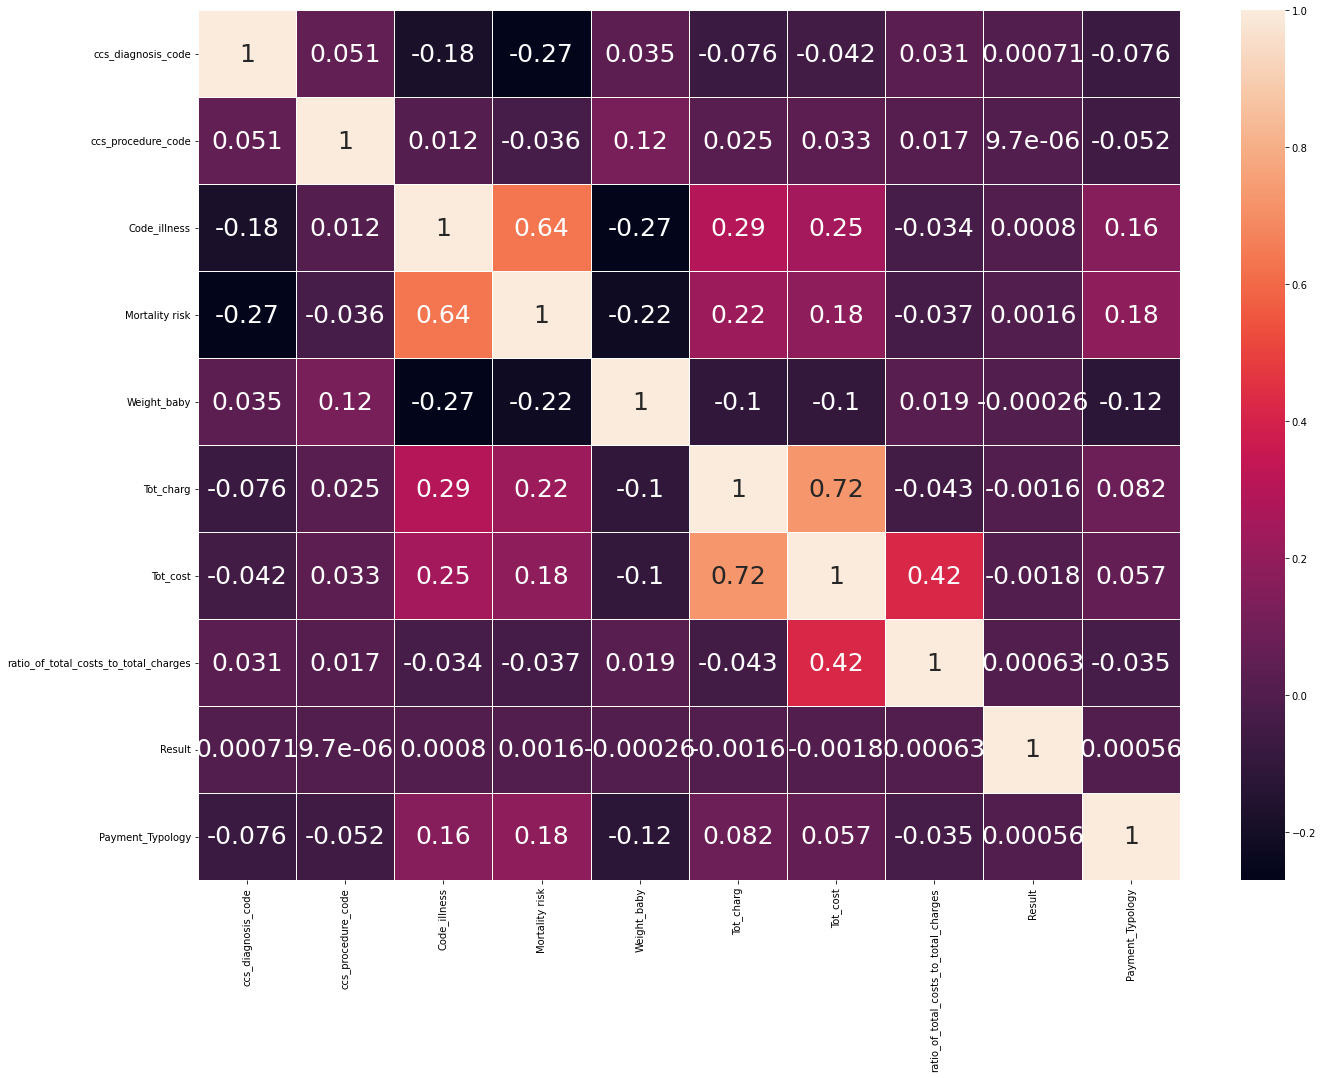

In [19]:
plt.figure(figsize=(22,16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True,linewidths=1,annot_kws={'size': 25})

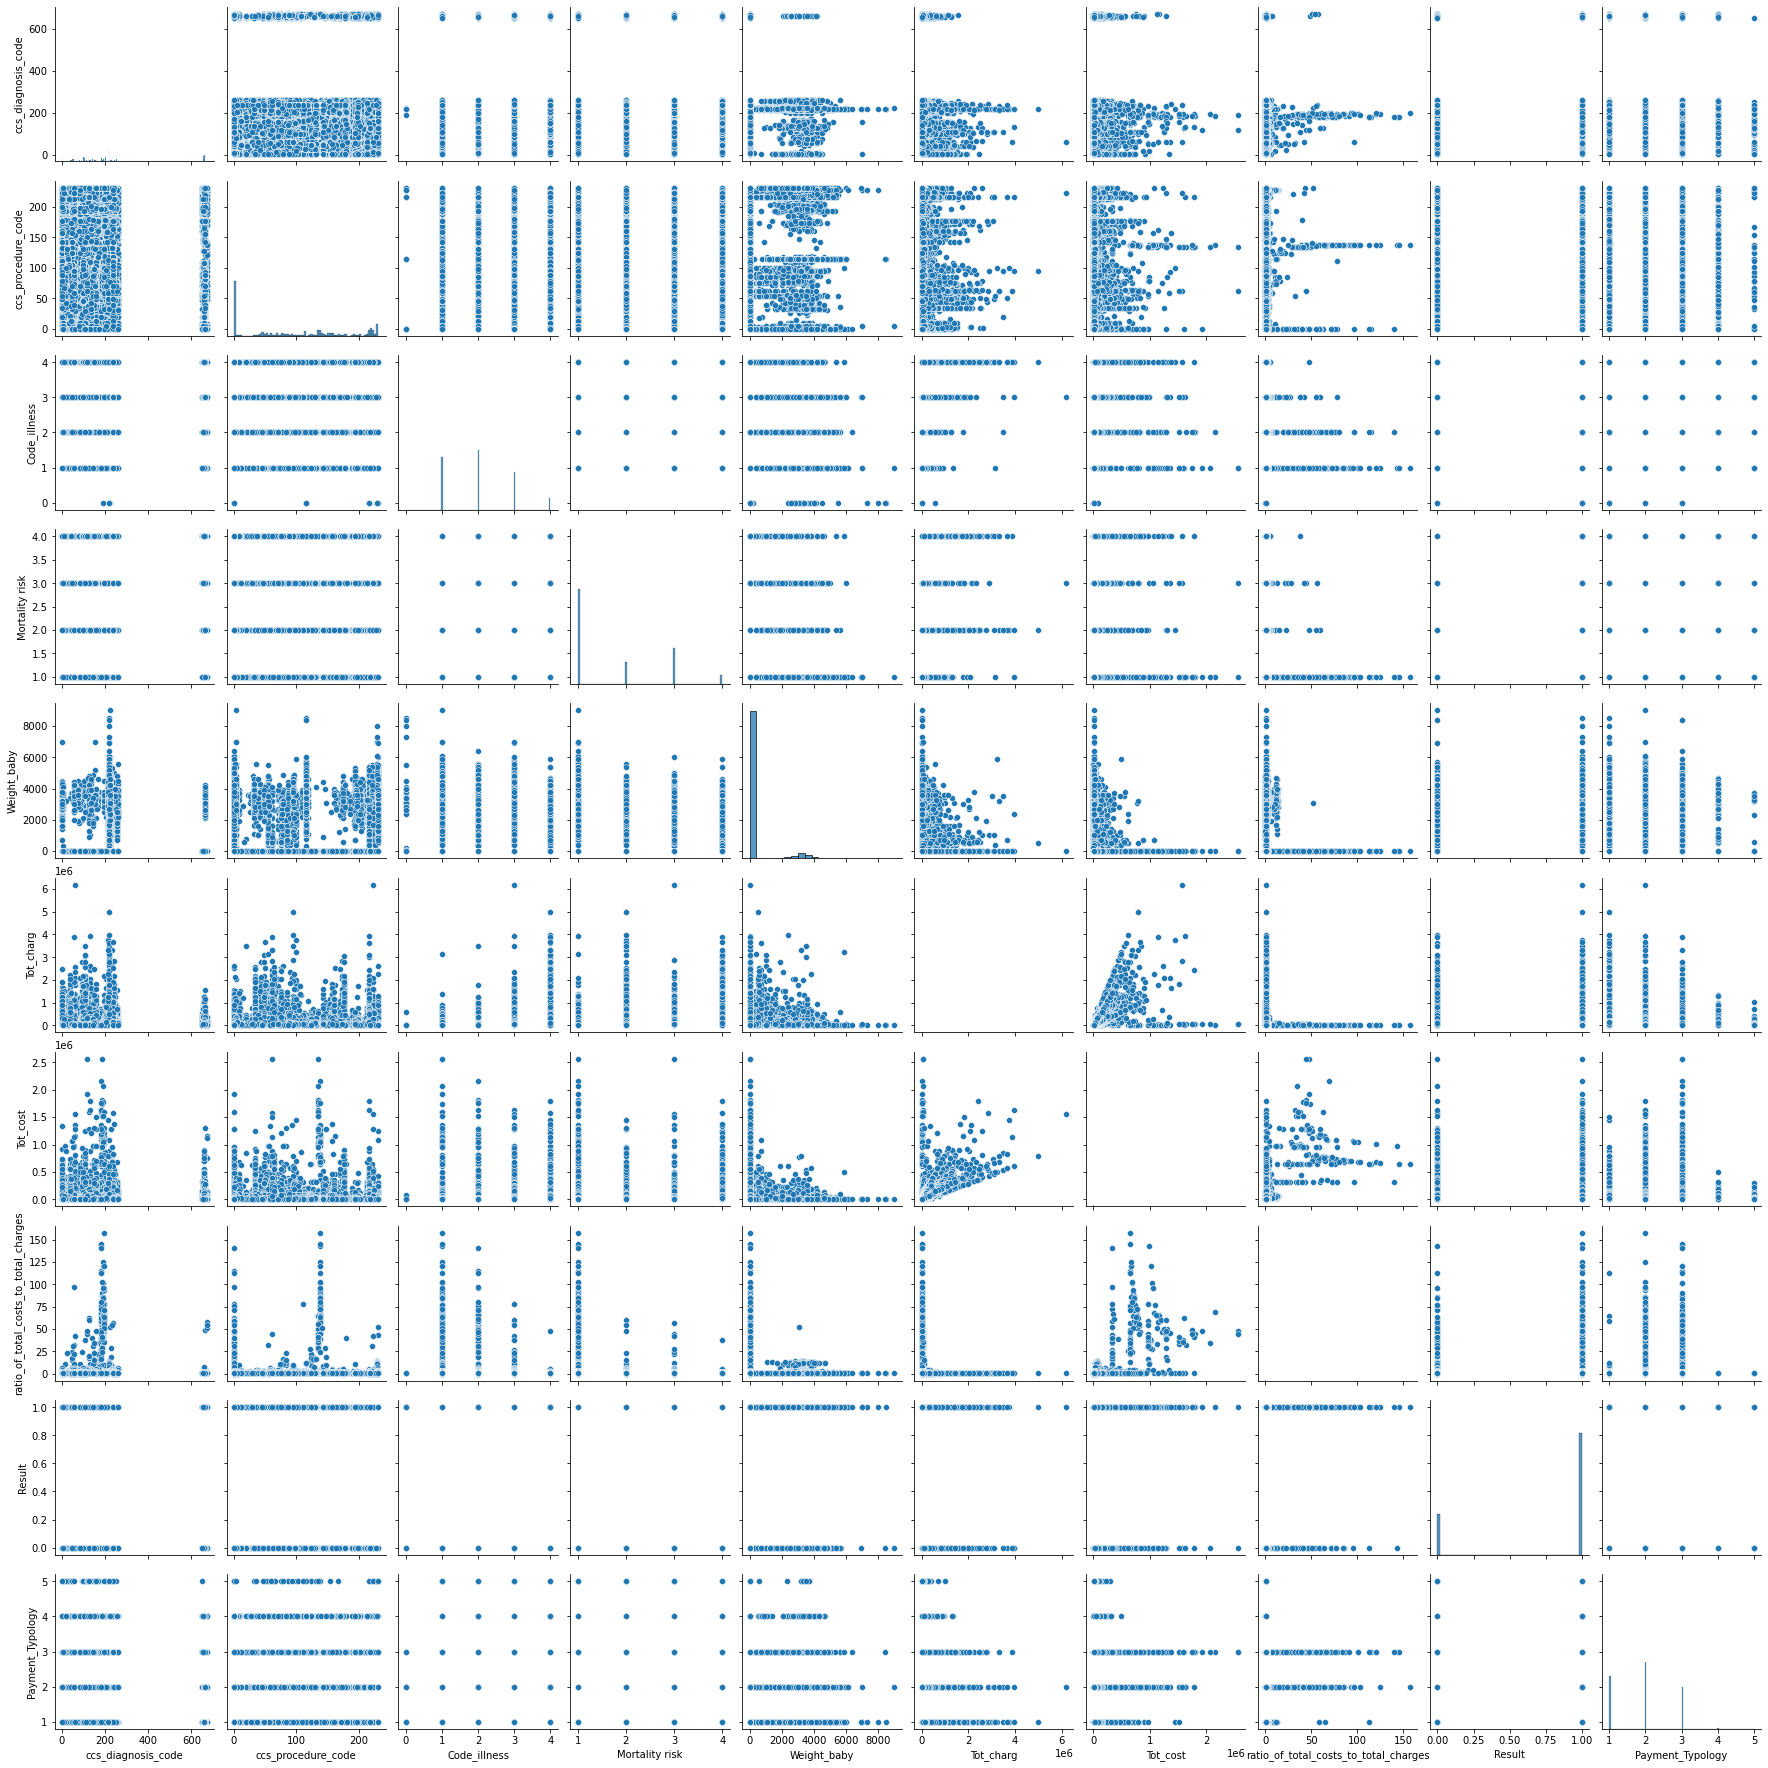

In [20]:
sns.pairplot(data)

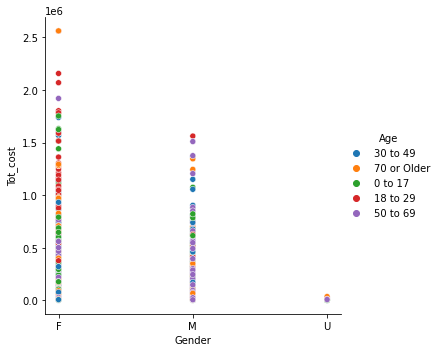

In [21]:
sns.relplot(x= 'Gender', y='Tot_cost', hue='Age', data=data)

<AxesSubplot:xlabel='Mortality risk', ylabel='Density'>

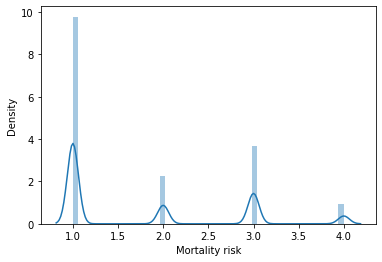

In [22]:
sns.distplot(data['Mortality risk'])

**Rename the columns**

In [40]:
data.rename({'Hospital County':'Hospital_County','Hospital Id':'Hospital_Id','Home or self care':'Home_or_self_care','Mortality risk':'Mortality_risk','Emergency dept_yes/No':'Emergency_dept_yes/No'},axis=1,inplace=True)

In [41]:
data

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,...,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,...,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,...,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,...,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,...,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


**Numerical and categorical columns**

In [42]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

In [43]:
numeric_cols

['ccs_diagnosis_code',
 'ccs_procedure_code',
 'Code_illness',
 'Mortality_risk',
 'Weight_baby',
 'Tot_charg',
 'Tot_cost',
 'ratio_of_total_costs_to_total_charges',
 'Result',
 'Payment_Typology']

In [44]:
categorical_cols = data.select_dtypes(include='object').columns.tolist() 

In [45]:
categorical_cols

['Area_Service',
 'Hospital_County',
 'Age',
 'Gender',
 'Cultural_group',
 'ethnicity',
 'Days_spend_hsptl',
 'Admission_type',
 'Home or self care,',
 'apr_drg_description',
 'Surg_Description',
 'Abortion',
 'Emergency_dept_yes/No']

In [46]:
data.isna().sum().sort_values(axis=0, ascending=False)

Area_Service                             0
Code_illness                             0
Result                                   0
ratio_of_total_costs_to_total_charges    0
Tot_cost                                 0
Tot_charg                                0
Emergency_dept_yes/No                    0
Abortion                                 0
Weight_baby                              0
Surg_Description                         0
Mortality_risk                           0
apr_drg_description                      0
Hospital_County                          0
ccs_procedure_code                       0
ccs_diagnosis_code                       0
Home or self care,                       0
Admission_type                           0
Days_spend_hsptl                         0
ethnicity                                0
Cultural_group                           0
Gender                                   0
Age                                      0
Payment_Typology                         0
dtype: int6

In [47]:
total_sum_of_null_values=data.isna().sum().sort_values(axis=0, ascending=False).sum()

In [48]:
total_sum_of_null_values

0

In [49]:
percentage_of_null_values=(total_sum_of_null_values/1048575)*100
percentage_of_null_values

0.0

In [50]:
#percentage of null values is very negligible(i.e 0.4)
data.dropna(axis=0,inplace=True)

In [51]:
data.isna().sum()

Area_Service                             0
Hospital_County                          0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality_risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency_dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typology                         0
dtype: int6

In [52]:
data.shape

(1046077, 23)

In [53]:
raw_data = data.copy()
raw_data

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,...,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,...,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,...,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,...,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,...,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [54]:
#Handling Numeric Missing values

In [55]:
raw_data[numeric_cols].isnull().sum().sort_values(ascending=False)

ccs_diagnosis_code                       0
ccs_procedure_code                       0
Code_illness                             0
Mortality_risk                           0
Weight_baby                              0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typology                         0
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
#replace numeric columns
imputer = SimpleImputer(strategy='mean').fit(raw_data[numeric_cols])

In [58]:
raw_data[numeric_cols]=imputer.transform(raw_data[numeric_cols])

In [59]:
raw_data[numeric_cols].isnull().sum()

ccs_diagnosis_code                       0
ccs_procedure_code                       0
Code_illness                             0
Mortality_risk                           0
Weight_baby                              0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typology                         0
dtype: int64

In [60]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(raw_data[categorical_cols])


In [61]:
raw_data[categorical_cols]= imp.transform(raw_data[categorical_cols])

In [62]:
raw_data[categorical_cols].isnull().sum()

Area_Service             0
Hospital_County          0
Age                      0
Gender                   0
Cultural_group           0
ethnicity                0
Days_spend_hsptl         0
Admission_type           0
Home or self care,       0
apr_drg_description      0
Surg_Description         0
Abortion                 0
Emergency_dept_yes/No    0
dtype: int64

In [63]:
#Check in the duplicated records
raw_data[raw_data.duplicated()]

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,...,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1125,Western NY,Allegany,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,3700.0,N,N,1678.75,737.21,0.439141,1.0,1.0
3086,Western NY,Cattaraugus,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,3600.0,N,N,1251.50,829.70,0.662961,0.0,1.0
3226,Western NY,Cattaraugus,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,2700.0,N,N,1150.50,788.65,0.685486,1.0,1.0
4209,Western NY,Cattaraugus,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,2700.0,N,N,1150.50,788.65,0.685486,1.0,1.0
4234,Western NY,Cattaraugus,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,2800.0,N,N,1150.50,788.65,0.685486,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015327,New York City,Bronx,0 to 17,F,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,2900.0,N,N,5955.85,1303.62,0.218881,1.0,3.0
1025529,New York City,Bronx,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83.0,...,1.0,Medical,0.0,N,N,12500.00,2960.11,0.236809,1.0,3.0
1028997,New York City,Bronx,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83.0,...,1.0,Medical,0.0,N,N,12557.00,2963.40,0.235996,1.0,2.0
1035973,New York City,Bronx,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83.0,...,1.0,Medical,0.0,N,N,12500.00,2960.11,0.236809,1.0,3.0


In [64]:
#Removing the duplicated rows
raw_data=raw_data.drop_duplicates()

In [65]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041263 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041263 non-null  object 
 1   Hospital_County                        1041263 non-null  object 
 2   Age                                    1041263 non-null  object 
 3   Gender                                 1041263 non-null  object 
 4   Cultural_group                         1041263 non-null  object 
 5   ethnicity                              1041263 non-null  object 
 6   Days_spend_hsptl                       1041263 non-null  object 
 7   Admission_type                         1041263 non-null  object 
 8   Home or self care,                     1041263 non-null  object 
 9   ccs_diagnosis_code                     1041263 non-null  float64
 10  ccs_procedure_code                     104

In [66]:
#pd.set_option('display.max_rows',1000)
raw_data.groupby(['Age','Admission_type']).Days_spend_hsptl.count().sort_values(ascending=False).reset_index()

,Age,Admission_type,Days_spend_hsptl
0,70 or Older,Emergency,228825
1,50 to 69,Emergency,182072
2,30 to 49,Emergency,108119
3,0 to 17,Newborn,86474
4,50 to 69,Elective,70764
5,30 to 49,Elective,65121
6,18 to 29,Emergency,50246
7,70 or Older,Elective,46988
8,18 to 29,Elective,43685
9,0 to 17,Emergency,37121


<AxesSubplot:>

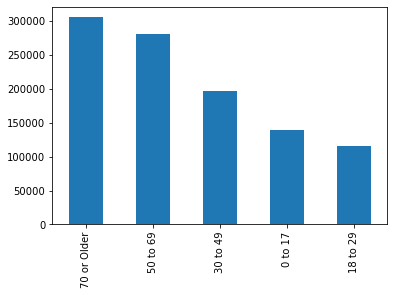

In [67]:
raw_data.Age.value_counts().plot(kind='bar')

<AxesSubplot:>

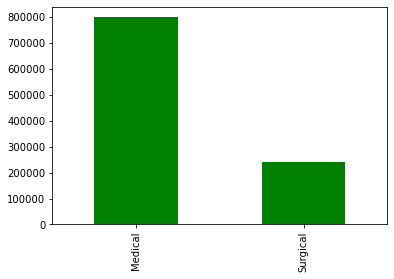

In [68]:
#plt.bar(raw_data,x='Surg_Description',color='Surg_Description)
raw_data.Surg_Description.value_counts().plot(kind='bar',color='green')

<AxesSubplot:xlabel='Tot_cost', ylabel='Density'>

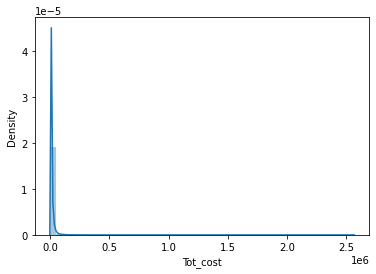

In [69]:
ssn.distplot(data['Tot_cost'])

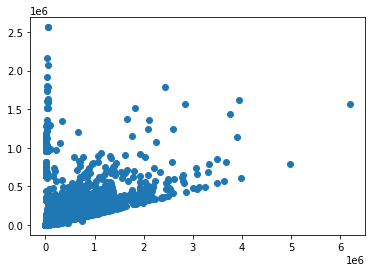

In [70]:
plt.scatter(data['Tot_charg'],y=data['Tot_cost'])

<AxesSubplot:xlabel='Admission_type', ylabel='Tot_charg'>

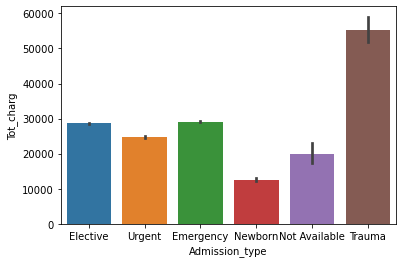

In [71]:
#raw_data['Tot_Amt_diff'] = data['Tot_cost']-data['Tot_charg']
ssn.barplot(x='Admission_type',y='Tot_charg',data=raw_data)